## Interesul  
Ne intereseaza sa intelegem:
- sentence split
- tokenization
- pos-tag
- lemmatization
- named entity recognition
- dependency parsing
- chunking

# Spacy

In [2]:
import spacy

nlp = spacy.load("en_core_web_sm")
nlpro = spacy.load("ro_core_news_sm")

In [5]:
test1 = nlpro("Ieri am fost la piata. Am luat o multime de legume. Printre ele se numara rosii, cartofi, morcovi si ceapa. Cand am plecat de acolo, m-am intalnit cu un prieten, Marius. Am stat de vorba cu el si am aflat ca a fost la un concert. A fost foarte frumos, mi-a spus el. M-a invitat si pe mine, dar eu nu am putut sa merg. Am avut de facut multe lucruri. Am ajuns acasa tarziu si am adormit imediat. A fost o zi obositoare.")

sentences = list(test1.sents)
for i, sentence in enumerate(sentences):
    print(f"Propozitia {i+1}: {sentence}")

Propozitia 1: Ieri am fost la piata.
Propozitia 2: Am luat o multime de legume.
Propozitia 3: Printre ele se numara rosii, cartofi, morcovi si ceapa.
Propozitia 4: Cand am plecat de acolo, m-am intalnit cu un prieten, Marius.
Propozitia 5: Am stat de vorba cu el si am aflat ca a fost la un concert.
Propozitia 6: A fost foarte frumos, mi-a spus el.
Propozitia 7: M-a invitat si pe mine, dar eu nu am putut sa merg.
Propozitia 8: Am avut de facut multe lucruri.
Propozitia 9: Am ajuns acasa tarziu si am adormit imediat.
Propozitia 10: A fost o zi obositoare.


In [12]:
for sent in sentences:
    print(f"Propozitia: {sent}")
    # have the table hads be bolded, write next print with bold
    print(f"\033[4m{'ID':4} {'Text':12} {'POS':6} {'DEP':6} {'LEMMA':8} {'NAMED'}\033[0m")
    for token in sent:
        # print text, pos, dep, lemma and named entity in a nice table
        print(f"{token.idx:4} {token.text:12} {token.pos_:6} {token.dep_:6} {token.lemma_:8} {token.ent_type_ }")
    print("---------------------")

Propozitia: Ieri am fost la piata.
ID   Text         POS    DEP    LEMMA    NAMED
   0 Ieri         ADV    advmod Ieri     
   5 am           AUX    aux    avea     
   8 fost         VERB   ROOT   fi       
  13 la           ADP    case   la       
  16 piata        NOUN   obl    piată    
  21 .            PUNCT  punct  .        
---------------------
Propozitia: Am luat o multime de legume.
ID   Text         POS    DEP    LEMMA    NAMED
  23 Am           AUX    aux    avea     
  26 luat         VERB   ROOT   lua      
  31 o            DET    det    un       
  33 multime      NOUN   obj    multime  
  41 de           ADP    case   de       
  44 legume       NOUN   nmod   legumă   
  50 .            PUNCT  punct  .        
---------------------
Propozitia: Printre ele se numara rosii, cartofi, morcovi si ceapa.
ID   Text         POS    DEP    LEMMA    NAMED
  52 Printre      ADP    case   printre  
  60 ele          PRON   nsubj  el       
  64 se           PRON   expl:pv sine    

In [37]:
english = nlp("Yesterday I went to get groceries. On my way, I met Andrew. He seemed really happy, and he told me he had just gone to a concert the night before. He was really excited and told me all about it.")

In [42]:
# print chunks in english text, in nice tablet format
print(f"\033[4m{'Text':12} {'Root':6} {'Dep':6} {'Head':8}\033[0m")
for chunk in english.noun_chunks:_
    print(f"{chunk.text:12} {chunk.root.text:6} {chunk.root.dep_:6} {chunk.root.head.text:8}")
# print tokenization in english text, in nice tablet format
print(f"\033[4m{'Text':12} {'POS':6} {'DEP':6} {'LEMMA':8} {'NAMED'}\033[0m")
for token in english:
    print(f"{token.text:12} {token.pos_:6} {token.dep_:6} {token.lemma_:8} {token.ent_type_ }")

Text         Root   Dep    Head    
I            I      nsubj  went    
groceries    groceries dobj   get     
my way       way    pobj   On      
I            I      nsubj  met     
Andrew       Andrew dobj   met     
He           He     nsubj  seemed  
he           he     nsubj  told    
me           me     dobj   told    
he           he     nsubj  gone    
a concert    concert pobj   to      
He           He     nsubj  was     
me           me     dative told    
all          all    dobj   told    
it           it     pobj   about   
Text         POS    DEP    LEMMA    NAMED
Yesterday    NOUN   npadvmod yesterday DATE
I            PRON   nsubj  I        
went         VERB   ROOT   go       
to           PART   aux    to       
get          VERB   advcl  get      
groceries    NOUN   dobj   grocery  
.            PUNCT  punct  .        
On           ADP    prep   on       
my           PRON   poss   my       
way          NOUN   pobj   way      
,            PUNCT  punct  ,        


In [36]:
# for each sentence, print chunks in a nice table
for sent in sentences:
    print(f"Propozitia: {sent}")
    print(f"\033[4m{'Text':12} {'POS':6} {'DEP':6} {'LEMMA':8} {'NAMED'}\033[0m")
    for chunk in sent.noun_chunks:
        print(chunk)
    print("---------------------")

Propozitia: Ieri am fost la piata.
Text         POS    DEP    LEMMA    NAMED


NotImplementedError: [E894] The 'noun_chunks' syntax iterator is not implemented for language 'ro'.

# NLP Cube

In [46]:
from cube.api import Cube
cube = Cube(verbose=True)
cube.load("ro", device="cpu")

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaModel: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaModel: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a m

In [47]:
ro = cube("Ieri am fost la piata. Am luat o multime de legume. Printre ele se numara rosii, cartofi, morcovi si ceapa. Cand am plecat de acolo, m-am intalnit cu un prieten, Marius. Am stat de vorba cu el si am aflat ca a fost la un concert. A fost foarte frumos, mi-a spus el. M-a invitat si pe mine, dar eu nu am putut sa merg. Am avut de facut multe lucruri. Am ajuns acasa tarziu si am adormit imediat. A fost o zi obositoare.")

/mnt/e/CodingAndDev/Projects/facultate/NLP/nlpenv/lib/python3.9/site-packages/cube/networks/utils.py:308: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  x_word_embeddings = [torch.tensor(t) for t in x_word_embeddings]


In [67]:
# split into sentences
sentences = ro.sentences

for word in sentences[0].words:
    print(word)
    # print(word.__dict__)
    # print(f"{word.index:5} {word.word:12} {word.lemma:8} {word.upos:6} {word.xpos:6} {word.head:6} {word.label:6} ")
    

1	Ieri	ieri	ADV	Rgp	Degree=Pos	3	advmod	_	_
2	am	avea	AUX	Va--1	Person=1	3	aux	_	_
3	fost	fi	VERB	Vmp--sm	Gender=Masc|Number=Sing|VerbForm=Part	0	root	_	_
4	la	la	ADP	Spsa	AdpType=Prep|Case=Acc	5	case	_	_
5	piata	piată	NOUN	Ncfsry	Case=Acc,Nom|Definite=Def|Gender=Fem|Number=Sing	3	obl	_	_
6	.	.	PUNCT	PERIOD	_	8	punct	_	_
7	Am	avea	AUX	Va--1	Person=1	8	aux	_	_
8	luat	lua	VERB	Vmp--sm	Gender=Masc|Number=Sing|VerbForm=Part	3	conj	_	_
9	o	un	DET	Tifsr	Case=Acc,Nom|Gender=Fem|Number=Sing|PronType=Ind	10	det	_	_
10	multime	multime	NOUN	Ncfsrn	Case=Acc,Nom|Definite=Ind|Gender=Fem|Number=Sing	8	obj	_	_
11	de	de	ADP	Spsa	AdpType=Prep|Case=Acc	10	case	_	_
12	legume	legumă	NOUN	Ncfp-n	Definite=Ind|Gender=Fem|Number=Plur	8	obj	_	_
13	.	.	PUNCT	PERIOD	_	17	punct	_	_
14	Printre	printre	ADP	Spsa	AdpType=Prep|Case=Acc	15	case	_	_
15	ele	el	PRON	Pp3fpr--------s	Case=Acc,Nom|Gender=Fem|Number=Plur|Person=3|PronType=Prs|Strength=Strong	17	obl	_	_
16	se	sine	PRON	Px3--a--------w	Case=Acc|Person=3|PronType

# Note

- spacy ori e limitat comparativ cu nlpcube (v. noun chunks), ori nu am gasit cum anume sa il folosesc mai bine
- nlpcube are din prima mai multe unelte, dar nu am acces la type ca sa vad ce atribute are un obiect, ar trebui sa intru in codul librariei ca sa verific
- romana putin limitata fata de engleza, sunt cateva warninguri
- foarte greu de citit partea cu pos si partea de propozitie daca nu stii gramatica & exersezi prescurtarile ca sa tii minte fiecare ce e 
- nlpcube ne ofera si un embedding pentru folosire in modele, nu am gasit ceva asemanator in spacy


Update:  
- am gasit embed vector si pentru spacy, trebuie mers pe partea de token

In [21]:
import spacy
from nltk import Tree


en_nlp = spacy.load('en_core_web_sm')
ro_nlp = spacy.load('ro_core_news_sm')
doc = en_nlp("The quick brown fox jumps over the lazy dog.")
docro = ro_nlp("Vulpea maro rapida sare peste cainele lenes.")

def to_nltk_tree(node):
    if node.n_lefts + node.n_rights > 0:
        return Tree(node.orth_, [to_nltk_tree(child) for child in node.children])
    else:
        return node.orth_


[to_nltk_tree(sent.root).pretty_print() for sent in docro.sents]
[to_nltk_tree(sent.root).pretty_print() for sent in doc.sents]

                 sare                     
  ________________|_____________           
 |       Vulpea              cainele      
 |    _____|______        ______|______    
 .  maro        rapida peste         lenes

        jumps                    
  ________|______________         
 |        |             over     
 |        |              |        
 |       fox            dog      
 |    ____|_____      ___|____    
 .  The quick brown the      lazy



[None]

In [22]:
maria = ro_nlp("Maria este o fata frumoasa si desteapta. Am luat o multime de legume, printre care ceapa, morcovi si cartofi.")
[to_nltk_tree(sent.root).pretty_print() for sent in maria.sents]

           fata                           
   _________|______________                
  |    |    |    |      frumoasa          
  |    |    |    |    _____|_________      
Maria este  o    .   si          desteapta

                   luat                              
  __________________|______                           
 |   |                  multime                      
 |   |    _________________|______                    
 |   |   |    |                 ceapa                
 |   |   |    |      _____________|______             
 |   |   |  legume  |     care        morcovi        
 |   |   |    |     |      |       ______|_______     
 Am  .   o    de    ,   printre   ,      si   cartofi



[None, None]

In [25]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
nlp_ro = spacy.load("ro_core_news_sm")
doc = nlp("This is a sentence.")
docro = nlp_ro("Asta este o propozitie in care nu stiu ce altceva pot pune.")
# displacy.serve(doc, style="dep")
displacy.serve(docro, style="dep")


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


# Word similarity, wordnet and rowordnet below

In [19]:
import nltk
nltk.download('wordnet')
nltk.download('wordnet_ic')

[nltk_data] Downloading package wordnet to /home/cosmin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet_ic to
[nltk_data]     /home/cosmin/nltk_data...
[nltk_data]   Unzipping corpora/wordnet_ic.zip.


True

In [22]:
from nltk.corpus import wordnet as wordnet
import rowordnet as rwn
from nltk.corpus import wordnet_ic
ic = wordnet_ic.ic('ic-bnc-resnik-add1.dat')

In [56]:
# word list to consider
words = ["dog", "cat", "fish", "bird", "apple", "banana", "car", "bike", "house", "tree", "road", "person", "child"]
# there are 6 similarity measures in wordnet, we'll apply all of them for each pair of words and create a matrix for the scores; so we'll have 6 matrices
similarity_matrices = []
# for each similarity measure
for measure in ["path", "lch", "wup", "res", "jcn", "lin"]:
    # create a matrix
    matrix = []
    # for each word
    for word1 in words:
        row = []
        # for each word
        for word2 in words:
            # get the synsets for the words
            synsets1 = wordnet.synsets(word1)
            synsets2 = wordnet.synsets(word2)
            # if there are synsets for both words
            if synsets1 and synsets2:
                # get the similarity score
                
                #if measure is res, jcn or lin we also need the ic 
                if measure in ["res", "jcn", "lin"]:
                    if measure == "jcn" and synsets1 == synsets2:
                        score = 1
                    else:
                        score = getattr(wordnet, f"{measure}_similarity")(synsets1[0], synsets2[0], ic)

                else:
                    score = getattr(wordnet, f"{measure}_similarity")(synsets1[0], synsets2[0])
            else:
                # if there are no synsets, the score is 0
                score = 0
            # append the score to the row
            row.append(score)
        # append the row to the matrix
        matrix.append(row)
    # append the matrix to the list of matrices
    similarity_matrices.append(matrix)

In [5]:
# plot the matrices nicely with displayed words
import matplotlib.pyplot as plt
import numpy as np


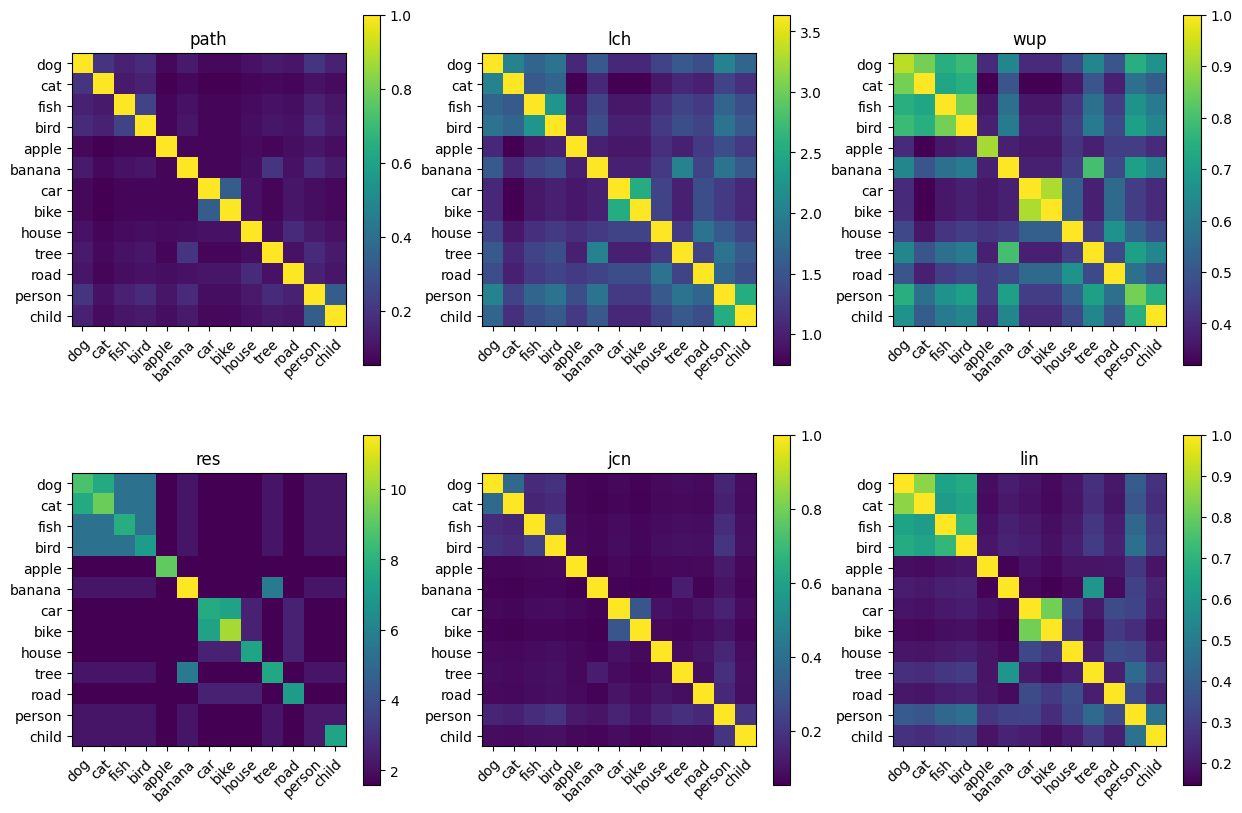

In [59]:
# plot matrices nicely
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, measure in enumerate(["path", "lch", "wup", "res", "jcn", "lin"]):
    ax = axs[i//3, i%3]
    # display value-color mapping to the side of each
    cbar = ax.imshow(similarity_matrices[i], cmap="viridis")
    fig.colorbar(cbar, ax=ax)
    ax.set_xticks(np.arange(len(words)))
    ax.set_yticks(np.arange(len(words)))
    ax.set_xticklabels(words)
    ax.set_yticklabels(words)
    ax.set_title(measure)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

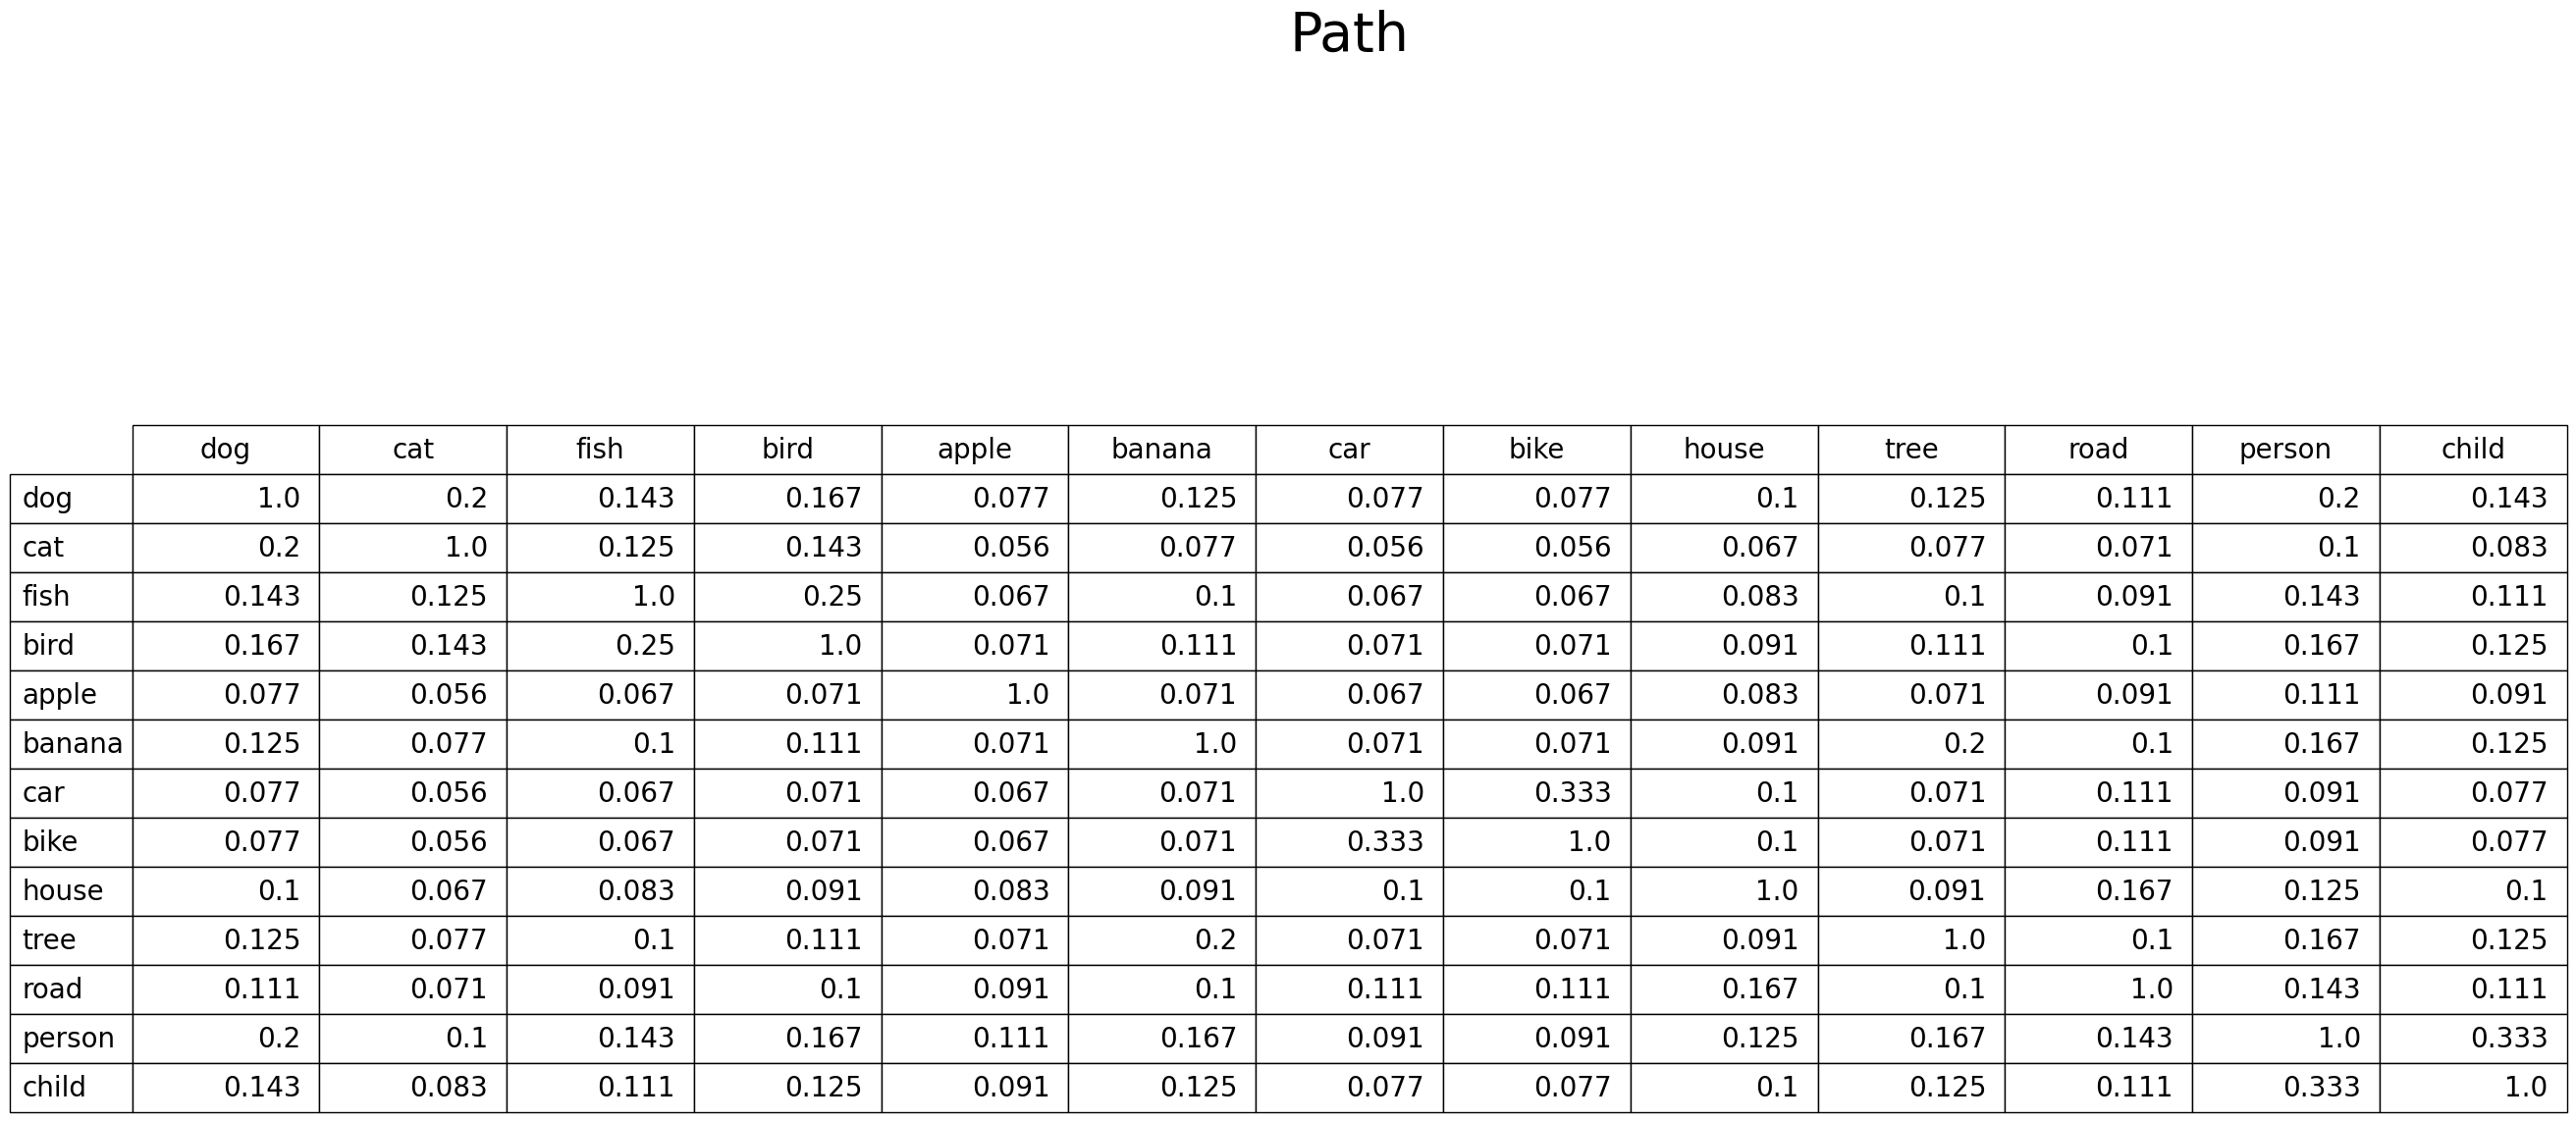

In [113]:
# plot the matrices in tables, showing values as they are
# Create a figure and axes
currentIndex = 0
matrix_to_plot = [[round(value,3) for value in row] for row in similarity_matrices[currentIndex]]
fig, ax = plt.subplots()
title = ["Path", "LCH", "WUP", "RES", "JCN", "LIN"][currentIndex]
ax.set_title(title, fontsize=40)  # 'pad' adjusts the distance between the title and the table
# Hide the axes
ax.set_axis_off()

# Create the table plot
table = ax.table(cellText=matrix_to_plot,
                 rowLabels=words,
                 colLabels=words,
                 loc="bottom")
# Adjust layout
table.auto_set_font_size(False)
table.set_fontsize(20)  # Set font size
table.scale(5, 3)      # Adjust cell size
# Show plot
plt.show()

In [89]:
for row in similarity_matrices[0]:
    for value in row:
        print(round(value, 3), end=" ")

1.0 0.2 0.143 0.167 0.077 0.125 0.077 0.077 0.1 0.125 0.111 0.2 0.143 0.2 1.0 0.125 0.143 0.056 0.077 0.056 0.056 0.067 0.077 0.071 0.1 0.083 0.143 0.125 1.0 0.25 0.067 0.1 0.067 0.067 0.083 0.1 0.091 0.143 0.111 0.167 0.143 0.25 1.0 0.071 0.111 0.071 0.071 0.091 0.111 0.1 0.167 0.125 0.077 0.056 0.067 0.071 1.0 0.071 0.067 0.067 0.083 0.071 0.091 0.111 0.091 0.125 0.077 0.1 0.111 0.071 1.0 0.071 0.071 0.091 0.2 0.1 0.167 0.125 0.077 0.056 0.067 0.071 0.067 0.071 1.0 0.333 0.1 0.071 0.111 0.091 0.077 0.077 0.056 0.067 0.071 0.067 0.071 0.333 1.0 0.1 0.071 0.111 0.091 0.077 0.1 0.067 0.083 0.091 0.083 0.091 0.1 0.1 1.0 0.091 0.167 0.125 0.1 0.125 0.077 0.1 0.111 0.071 0.2 0.071 0.071 0.091 1.0 0.1 0.167 0.125 0.111 0.071 0.091 0.1 0.091 0.1 0.111 0.111 0.167 0.1 1.0 0.143 0.111 0.2 0.1 0.143 0.167 0.111 0.167 0.091 0.091 0.125 0.167 0.143 1.0 0.333 0.143 0.083 0.111 0.125 0.091 0.125 0.077 0.077 0.1 0.125 0.111 0.333 1.0 

# RoWordNet below

In [1]:
import rowordnet as rwn
rown = rwn.RoWordNet()

In [15]:
cuvinte = ["câine", "pisică", "pește", "pasăre", "măr", "banană", "mașină", "bicicletă", "casă", "copac", "stradă", "persoană", "copil"]

# metrici similaritate intre fiecare pereche de cuvinte
matrici = []
for metrica in ["path", "lch", "wup"]:
    matrice = []
    for cuvant1 in cuvinte:
        rand = []
        for cuvant2 in cuvinte:
            # obtinem synset-urile pentru cuvinte
            synseturi1 = rown.synsets(cuvant1)
            synseturi2 = rown.synsets(cuvant2)
            # daca exista synset-uri pentru ambele cuvinte

            if synseturi1 and synseturi2:
                # obtinem scorul de similaritate
                scor = getattr(rown, f"{metrica}_similarity")(synseturi1[0], synseturi2[0])
            else:
                # daca nu exista synset-uri, scorul este 0
                print("Warning no synset")
                scor = 0
            # adaugam scorul la rand
            rand.append(scor)
        # adaugam randul la matrice
        matrice.append(rand)
    # adaugam matricea la lista de matrici
    matrici.append(matrice)

In [16]:
for matrix in matrici:
    for row in matrix:
        for value in row:
            print(value)

1
0.125
0.1111111111111111
0.1111111111111111
0.0625
0.0625
0.06666666666666667
0.0625
0.0625
0.09090909090909091
0.07692307692307693
0.0625
0.1
0.125
1
0.1111111111111111
0.125
0.058823529411764705
0.058823529411764705
0.0625
0.058823529411764705
0.07142857142857142
0.08333333333333333
0.07142857142857142
0.07142857142857142
0.09090909090909091
0.1111111111111111
0.1111111111111111
1
0.2
0.06666666666666667
0.06666666666666667
0.07142857142857142
0.06666666666666667
0.06666666666666667
0.1
0.08333333333333333
0.06666666666666667
0.1111111111111111
0.1111111111111111
0.125
0.2
1
0.06666666666666667
0.06666666666666667
0.07142857142857142
0.06666666666666667
0.07142857142857142
0.1
0.08333333333333333
0.07142857142857142
0.1111111111111111
0.0625
0.058823529411764705
0.06666666666666667
0.06666666666666667
1
0.25
0.06666666666666667
0.0625
0.0625
0.06666666666666667
0.07692307692307693
0.0625
0.07692307692307693
0.0625
0.058823529411764705
0.06666666666666667
0.06666666666666667
0.25
1


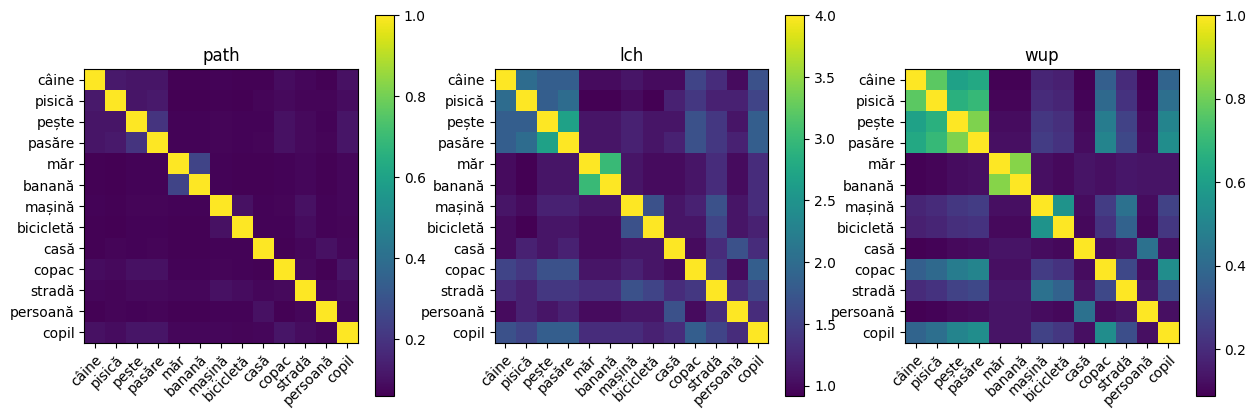

In [20]:
# plot matrici la fel ca la engleza
fig, axs = plt.subplots(1,3, figsize=(15,15))
for i, measure in enumerate(["path", "lch", "wup"]):
    ax = axs[i%3]
    # display value-color mapping to the side of each
    cbar = ax.imshow(matrici[i], cmap="viridis")
    fig.colorbar(cbar, ax=ax,shrink=0.33)
    ax.set_xticks(np.arange(len(cuvinte)))
    ax.set_yticks(np.arange(len(cuvinte)))
    ax.set_xticklabels(cuvinte)
    ax.set_yticklabels(cuvinte)
    ax.set_title(measure)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")